# Using `timeit` module for easy timing of small bits of code

To showcase a possible usage for `timeit` module, suppose that we work with matrices filled with random {0, 1} values, and we have to count the number of active pixels in them. 

So our data can be generated for example like:

In [2]:
import numpy as np

np.random.seed(123)

noise_matrix = np.round(np.random.rand(64, 64))

Which, by the way, looks like this when plotted:

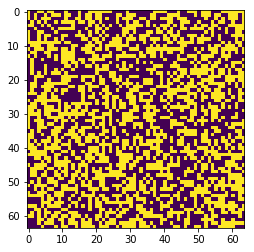

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(noise_matrix)

Now let's say we have to get the number of active pixels in the image. 

We can implement a trivial function to handle this task:

In [4]:
def sum_naive(matrix: np.ndarray):
    """
    Returns the number of positive elements in a matrix.
    """
    count = 0
    matrix = matrix.reshape(-1)
    for i in range(matrix.size):
        if matrix[i] > 0:
            count += 1
    return count

Clearly, instead of re-inventing the wheel, we could have just relied on the numpy library. The following would do the job too, right?

In [5]:
def sum_numpy(matrix: np.ndarray):
    """
    Returns the number of positive elements in a matrix.
    """
    return np.sum(matrix > 0)

Quick sanity-check that they both give the same result:

In [6]:
assert sum_naive(noise_matrix) == sum_numpy(noise_matrix)
print(f'Number of active pixels: {sum_naive(noise_matrix)}.')

Number of active pixels: 2051.


Cool, they both seem to work! But say that we are also concerned about performance. How does our `sum_naive` perform compared to the `sum_numpy` implementation?

The most obvious way to do it is by checking the current time with `time.time()`, executing our method a bunch of times, then calling again `time.time()` to check the elapsed time.

In [7]:
import time

n_exec = int(1e4)

# Benchmarking our custom method
t = time.time()
for _ in range(n_exec):
    sum_naive(matrix=noise_matrix)
elapsed_naive = (time.time() - t)

# Benchmarking numpy implementation
t = time.time()
for _ in range(n_exec):
    sum_numpy(matrix=noise_matrix)
elapsed_numpy = (time.time() - t)

print(f'Elapsed naive: {elapsed_naive:.06f} sec.')
print(f'Elapsed numpy: {elapsed_numpy:.06f} sec.')

Elapsed naive: 12.005263 sec.
Elapsed numpy: 0.112646 sec.


Good news is, there's a built-in module called `timeit` exactly for this kind of use case, i.e. providing a simple way to time small bits of Python code.

Let's refactor our benchmarking code to make use of it:

In [8]:
import timeit

elapsed_naive = timeit.timeit('sum_naive(noise_matrix)', globals=globals(), number=n_exec)
elapsed_numpy = timeit.timeit('sum_numpy(noise_matrix)', globals=globals(), number=n_exec)

print(f'Elapsed naive: {elapsed_naive:.06f} sec.')
print(f'Elapsed numpy: {elapsed_numpy:.06f} sec.')

Elapsed naive: 11.652674 sec.
Elapsed numpy: 0.102287 sec.


And that's it! Cool right? We saved quite a bunch of lines of code, and the result is even more readable.

Beyond code readability, the use of `timeit` has a bunch of other advantages. For example, it automatically [disables garbage collection during timing](https://docs.python.org/3/library/timeit.html#timeit.Timer.timeit) to maximize reproducibility of measurements. To the same end, there's a [convenience function which allows to call `timeit` repeatedly](https://docs.python.org/3/library/timeit.html#timeit.Timer.repeat) to minimize the influence of other tasks on the timing process.

For more details and advanced usage please refer to the [docs](https://docs.python.org/3/library/timeit.html).